# Load data and classifiers

In [1]:
from main import *
import eli5
LOAD_SAVED = True
OVERWRITE_SAVED = False
train_X, train_Y, test_X, test_Y, summary_cv, review_cv = memo.get_data(LOAD_SAVED, OVERWRITE_SAVED, CATEGORIES, 0.75, 1000)
clf_nb = memo.get_classifier(LOAD_SAVED, OVERWRITE_SAVED, trainer.naive_bayes, train_X, train_Y, 'clf_nb')
clf_lr = memo.get_classifier(LOAD_SAVED, OVERWRITE_SAVED, trainer.logistic_regression, train_X, train_Y, 'clf_lr')
clf_svm = memo.get_classifier(LOAD_SAVED, OVERWRITE_SAVED, trainer.svm, train_X, train_Y, 'clf_svm')
summary_cv = memo.load_pkl('static/summary_cv')
review_cv = memo.load_pkl('static/review_cv')
classes = list(sorted(set(train_Y)))

# Visualizing the classifiers

## Weight skews (Logistic Regression)

In [2]:
feature_names = summary_cv.get_feature_names() + review_cv.get_feature_names() + ['helpfulness rating'] + ['overall rating'] + ['review time']

In [3]:
eli5.show_weights(clf_lr,top=5,feature_names=feature_names,targets=classes)

## Example Prediction

In [4]:
eli5.show_prediction(clf_lr, test_X.getrow(400), feature_names=feature_names, targets=classes)

Some notes about our features:
- Features like review time, helpfulness rating, and overall rating seemed to have negative contributions to almost all category predictions.
- Our bias was always a strong feature, however almost always negative.
- Because we had two separate BOWs for our summary and review text, some words show up twice in the prediction models above.

# Predict

## Naive Bayes

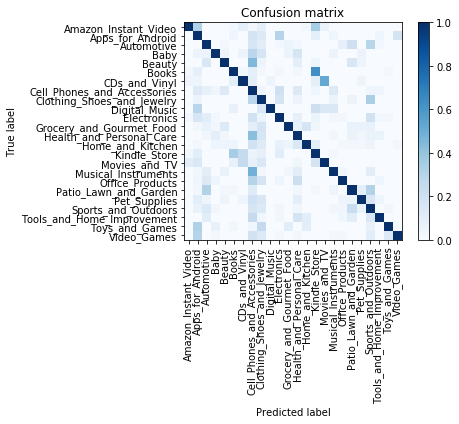

In [5]:
test_prd_nb = clf_nb.predict(test_X)
test_err_nb = tester.error_ratio(test_Y, test_prd_nb)

tester.disp_conf_matrix(test_Y, test_prd_nb, classes)

## Logistic Regression

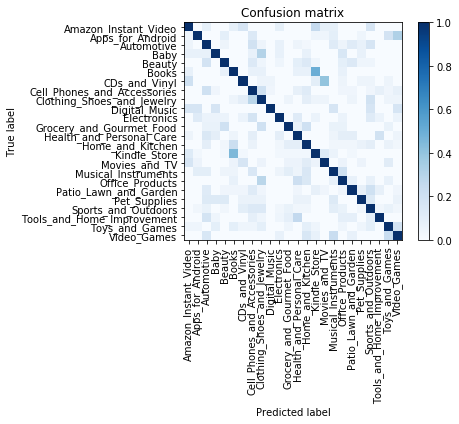

In [6]:
test_prd_lr = clf_lr.predict(test_X)
test_err_lr = tester.error_ratio(test_Y, test_prd_lr)

tester.disp_conf_matrix(test_Y, test_prd_lr, classes)

## Ensemble

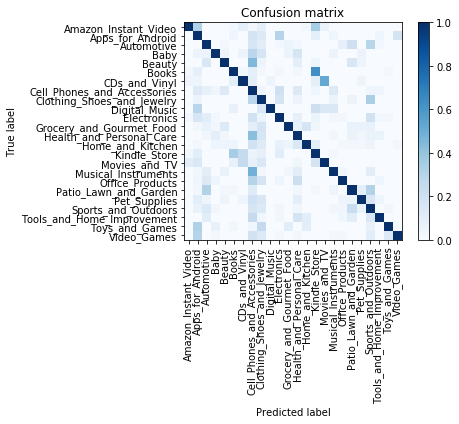

In [7]:
test_predictions = [test_prd_nb, test_prd_lr]
test_prd_ensemble = tester.predict_ensemble(test_X, test_predictions)
test_err_ensemble = tester.error_ratio(test_Y, test_prd_ensemble)

tester.disp_conf_matrix(test_Y, test_prd_ensemble, classes)

# Results

In [8]:
print("Naive Bayes Testing Error:         ",test_err_nb)
print("Logistic Regression Testing Error: ",test_err_lr)
print("Ensemble Testing Error:            ",test_err_ensemble)

Naive Bayes Testing Error:          0.24665461121157323
Logistic Regression Testing Error:  0.17902350813743217
Ensemble Testing Error:             0.24665461121157323
